# **LAB-8**
# **Cubic Spline Interpolation**

Rakshit Pandhi - 202201426

Kalp Shah - 202201457

Question 1

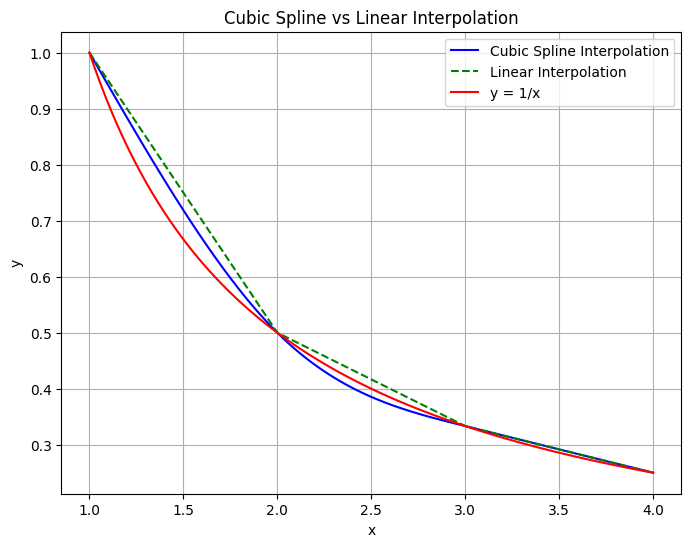

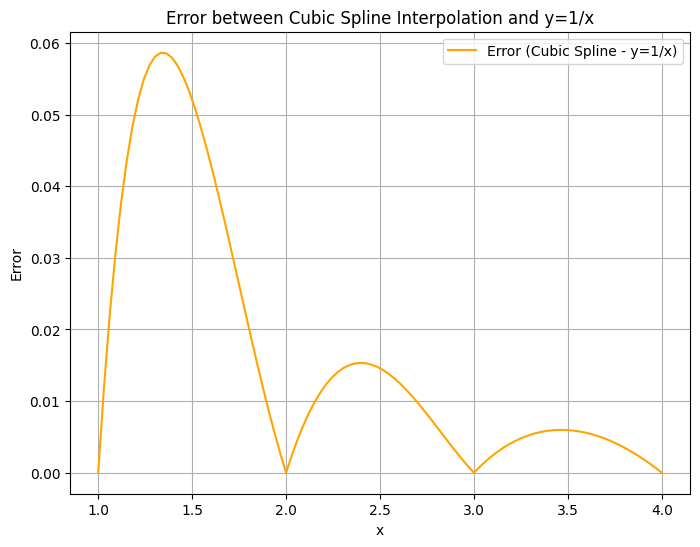

Maximum error between cubic spline and y=1/x: 0.058642


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x_data = np.array([1, 2, 3, 4])
y_data = np.array([1, 1/2, 1/3, 1/4])
n = len(x_data)


h = np.diff(x_data)


A = np.zeros((n, n))
B = np.zeros(n)


A[0, 0] = 1
A[-1, -1] = 1


for i in range(1, n-1):
    A[i, i-1] = h[i-1]
    A[i, i] = 2 * (h[i-1] + h[i])
    A[i, i+1] = h[i]
    B[i] = 3 * ((y_data[i+1] - y_data[i]) / h[i] - (y_data[i] - y_data[i-1]) / h[i-1])


c = np.linalg.solve(A, B)


b = np.zeros(n-1)
d = np.zeros(n-1)

for i in range(n-1):
    b[i] = (y_data[i+1] - y_data[i]) / h[i] - h[i] * (2 * c[i] + c[i+1]) / 3
    d[i] = (c[i+1] - c[i]) / (3 * h[i])


def cubic_spline(x, x_data, y_data, b, c, d):
    for i in range(n-1):
        if x_data[i] <= x <= x_data[i+1]:
            dx = x - x_data[i]
            return y_data[i] + b[i]*dx + c[i]*dx**2 + d[i]*dx**3
    return None

def linear_interp(x, x_data, y_data):
    for i in range(n-1):
        if x_data[i] <= x <= x_data[i+1]:
            return y_data[i] + (y_data[i+1] - y_data[i]) / (x_data[i+1] - x_data[i]) * (x - x_data[i])
    return None

def true_function(x):
    return 1 / x

x_vals = np.linspace(1, 4, 100)
y_cubic = [cubic_spline(x, x_data, y_data, b, c, d) for x in x_vals]
y_linear = [linear_interp(x, x_data, y_data) for x in x_vals]
y_true = true_function(x_vals)


plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_cubic, label='Cubic Spline Interpolation', color='blue')
plt.plot(x_vals, y_linear, label='Linear Interpolation', linestyle='--', color='green')
plt.plot(x_vals, y_true, label='y = 1/x', color='red')


plt.title('Cubic Spline vs Linear Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

error = np.abs(np.array(y_cubic) - y_true)


plt.figure(figsize=(8, 6))
plt.plot(x_vals, error, label='Error (Cubic Spline - y=1/x)', color='orange')
plt.title('Error between Cubic Spline Interpolation and y=1/x')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

max_error = np.max(error)
print(f"Maximum error between cubic spline and y=1/x: {max_error:.6f}")


**We can see that the error is relatively less for the interior points than the end points of the dataset given because of the boundary conditions that we apply.Though the error at 4 is till less,the reason can be the data point placement.The spacing and placement of the data points might not create enough tension in the spline to cause significant error at the boundaries.**

Question 2

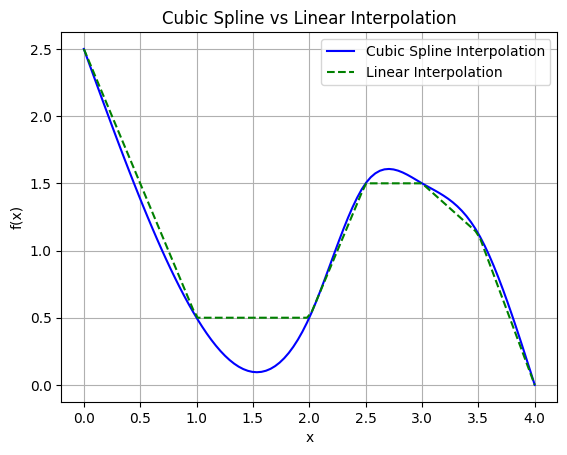

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([0, 1, 2, 2.5, 3, 3.5, 4])
y_data = np.array([2.5, 0.5, 0.5, 1.5, 1.5, 1.125, 0])


n = len(x_data)


a = y_data.copy()
b = np.zeros(n-1)
c = np.zeros(n)
d = np.zeros(n-1)

h = np.diff(x_data)


A = np.zeros((n, n))
rhs = np.zeros(n)

A[0, 0] = 1
A[-1, -1] = 1

for i in range(1, n-1):
    A[i, i-1] = h[i-1]
    A[i, i] = 2 * (h[i-1] + h[i])
    A[i, i+1] = h[i]
    rhs[i] = 3 * ((y_data[i+1] - y_data[i]) / h[i] - (y_data[i] - y_data[i-1]) / h[i-1])


c = np.linalg.solve(A, rhs)


for i in range(n-1):
    b[i] = (y_data[i+1] - y_data[i]) / h[i] - h[i] * (2*c[i] + c[i+1]) / 3
    d[i] = (c[i+1] - c[i]) / (3 * h[i])

def cubic_spline(x, x_data, a, b, c, d):
    for i in range(n-1):
        if x_data[i] <= x <= x_data[i+1]:
            dx = x - x_data[i]
            return a[i] + b[i]*dx + c[i]*dx**2 + d[i]*dx**3
    return None


def linear_interp(x, x_data, y_data):
    for i in range(n-1):
        if x_data[i] <= x <= x_data[i+1]:
            return y_data[i] + (y_data[i+1] - y_data[i]) / (x_data[i+1] - x_data[i]) * (x - x_data[i])
    return None


def true_function(x):
    return 1 / x


x_vals = np.linspace(0, 4, 100)
y_cubic = [cubic_spline(x, x_data, a, b, c, d) for x in x_vals]
y_linear = [linear_interp(x, x_data, y_data) for x in x_vals]

plt.plot(x_vals, y_cubic, label='Cubic Spline Interpolation', color='blue')
plt.plot(x_vals, y_linear, label='Linear Interpolation', linestyle='--', color='green')


plt.title('Cubic Spline vs Linear Interpolation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


Question 3

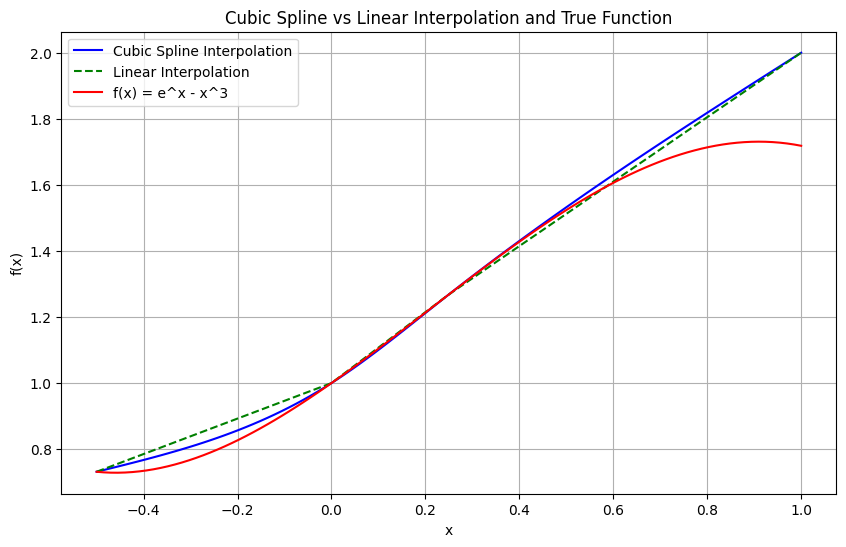

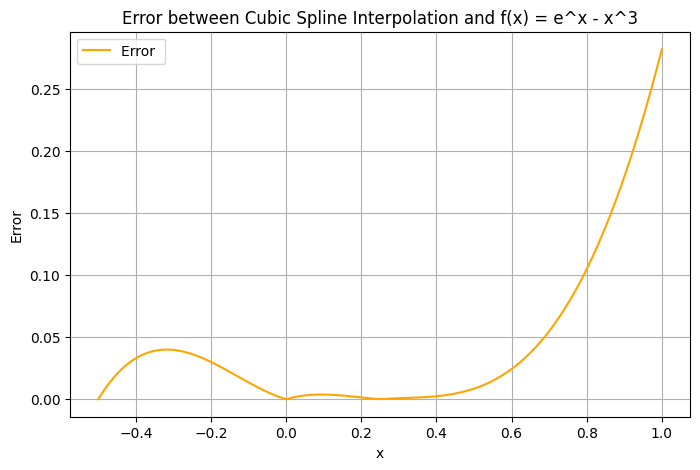

Maximum error between cubic spline and f(x) = e^x - x^3: 0.281718


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x_data = np.array([-0.5, 0, 0.25, 1])
y_data = np.array([0.73153, 1, 1.26840, 2])


n = len(x_data)




a = y_data.copy()
b = np.zeros(n-1)
c = np.zeros(n)
d = np.zeros(n-1)


h = np.diff(x_data)


A = np.zeros((n, n))
rhs = np.zeros(n)

A[0, 0] = 1
A[-1, -1] = 1


for i in range(1, n-1):
    A[i, i-1] = h[i-1]
    A[i, i] = 2 * (h[i-1] + h[i])
    A[i, i+1] = h[i]
    rhs[i] = 3 * ((y_data[i+1] - y_data[i]) / h[i] - (y_data[i] - y_data[i-1]) / h[i-1])


c = np.linalg.solve(A, rhs)


for i in range(n-1):
    b[i] = (y_data[i+1] - y_data[i]) / h[i] - h[i] * (2*c[i] + c[i+1]) / 3
    d[i] = (c[i+1] - c[i]) / (3 * h[i])


def cubic_spline(x, x_data, a, b, c, d):
    for i in range(n-1):
        if x_data[i] <= x <= x_data[i+1]:
            dx = x - x_data[i]
            return a[i] + b[i]*dx + c[i]*dx**2 + d[i]*dx**3
    return None

def linear_interp(x, x_data, y_data):
    for i in range(n-1):
        if x_data[i] <= x <= x_data[i+1]:
            return y_data[i] + (y_data[i+1] - y_data[i]) / (x_data[i+1] - x_data[i]) * (x - x_data[i])
    return None


def true_function(x):
    return np.exp(x) - x**3


x_vals = np.linspace(-0.5, 1, 100)
y_cubic = [cubic_spline(x, x_data, a, b, c, d) for x in x_vals]
y_linear = [linear_interp(x, x_data, y_data) for x in x_vals]
y_true = true_function(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_cubic, label='Cubic Spline Interpolation', color='blue')
plt.plot(x_vals, y_linear, label='Linear Interpolation', linestyle='--', color='green')
plt.plot(x_vals, y_true, label='f(x) = e^x - x^3', color='red')


plt.title('Cubic Spline vs Linear Interpolation and True Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


error_cubic = np.abs(np.array(y_cubic) - y_true)


plt.figure(figsize=(8, 5))
plt.plot(x_vals, error_cubic, label='Error ', color='orange')
plt.title('Error between Cubic Spline Interpolation and f(x) = e^x - x^3')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


max_error = np.max(error_cubic)
print(f"Maximum error between cubic spline and f(x) = e^x - x^3: {max_error:.6f}")


**Here as well the error at the interior points is less than that of the endpoints of the given data set because of the boundary conditions as discussed in Question 1 as well. Here near to 1 there occurs huge error due to the exponential function as it drastically shoots up faster in comparison to x^3.**